In [159]:
from ast import literal_eval

import numpy as np
import pandas as pd
from plotting import plot_confusion_matrix

In [160]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df['tokens'] = train_df['tokens'].apply(literal_eval)
test_df['tokens'] = test_df['tokens'].apply(literal_eval)

Check if there is a difference in distribution between train and test set

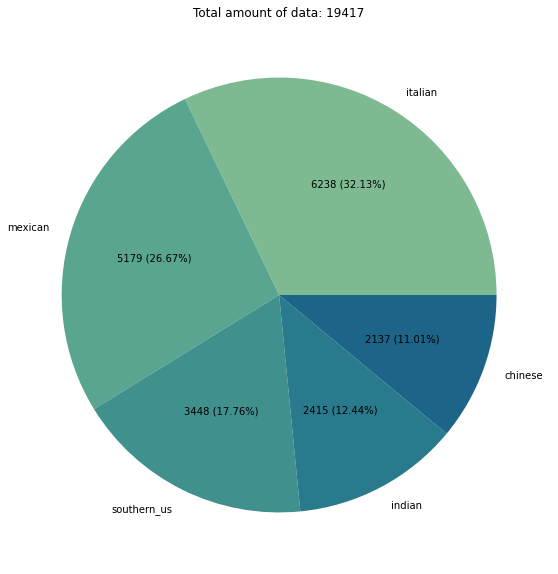

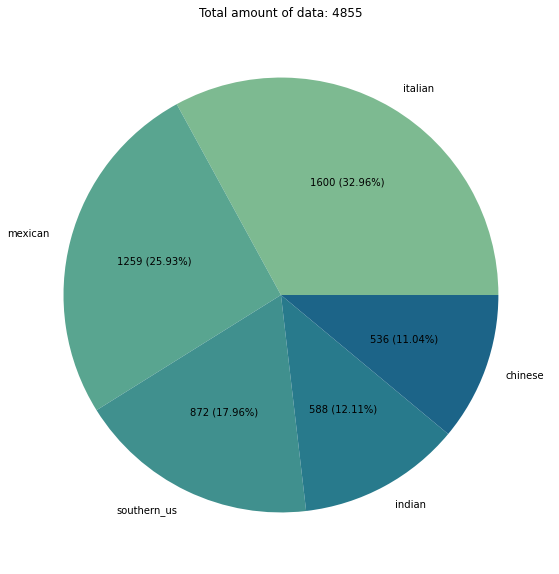

In [161]:
from plotting import pie_chart

X_train = train_df['tokens']
y_train = train_df['cuisine']
X_test = test_df['tokens']
y_test = test_df['cuisine']

pie_chart(y_train.value_counts())
pie_chart(y_test.value_counts())

In [162]:
ingredient_counts = X_train.explode().value_counts()
print('Amount of ingredients:', ingredient_counts.size)
print('Top 1000:')
ingredient_counts.head(1000)

Amount of ingredients: 1890
Top 1000:


salt         11736
oil          10499
pepper        9839
onion         8656
garlic        7362
             ...  
bud              6
sorghum          6
n                6
margarita        6
mayonnai         6
Name: tokens, Length: 1000, dtype: int64

In [163]:
MAX_FEATURES = 500

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(preprocessor=lambda x: ' '.join(x),
                                   # max_features=MAX_FEATURES
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [164]:
scores = np.asarray(X_train_tfidf.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': tfidf_vectorizer.get_feature_names(), 'score': scores})
counts_df.sort_values(by='score', ascending=False).head(50)

/opt/homebrew/Caskroom/miniforge/base/envs/itp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,score
1464,salt,1283.991280
1152,oil,1186.618741
1242,pepper,1152.641808
1159,onion,1075.220549
669,garlic,1001.563122
320,cheese,935.532999
739,ground,898.821785
1732,tomato,884.933241
1157,olive,849.243969
618,flour,787.592034


In [165]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000)

In [166]:
lr.fit(X_train_tfidf, y_train)

print('Train accuracy: ', lr.score(X_train_tfidf, y_train))
print('Test accuracy: ', lr.score(X_test_tfidf, y_test))

Train accuracy:  0.9424215893289386
Test accuracy:  0.9256436663233779


In [167]:
preds = lr.predict(X_test_tfidf)

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

     chinese       0.97      0.94      0.95       536
      indian       0.96      0.94      0.95       588
     italian       0.92      0.95      0.93      1600
     mexican       0.95      0.92      0.93      1259
 southern_us       0.86      0.87      0.87       872

    accuracy                           0.93      4855
   macro avg       0.93      0.92      0.93      4855
weighted avg       0.93      0.93      0.93      4855



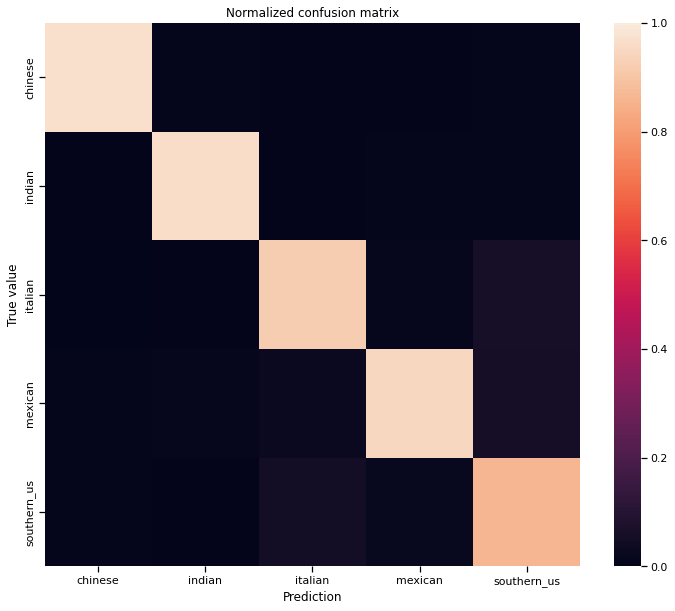

In [169]:
plot_confusion_matrix(y_test, preds, lr.classes_)